## Szimbolikus deriválás

Itt egy kidolgozott megoldás (lehet puskázni), utána néhány alkalmazás (avagy svájci bicska).

In [1]:
%pylab inline

class Expr:
    def __init__(self,lhs,rhs,op):
        self.lhs,self.rhs,self.op = lhs,rhs,op
        
    def __add__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'+')
        else:
            return Expr(self,rhs,'+n')
    
    def __radd__(self,lhs):
        return Expr(self,lhs,'+n')
    
    def __sub__(self,rhs):
        if type(rhs) == Expr:
            return self+rhs*(-1)
        else:
            return self+(-rhs)
        
    def __rsub__(self,lhs):
        return lhs+self*(-1)
    
    def __neg__(self):
        return (-1)*self
    
    def __mul__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'*')
        else:
            return Expr(self,rhs,'*n')
    
    def __rmul__(self,lhs):
        return Expr(self,lhs,'*n')
    
    def __truediv__(self,rhs):
        if type(rhs) == Expr:
            return self*rhs**(-1)
        else:
            return self*(1/rhs)
        
    def __rtruediv__(self,lhs):
        return self**(-1)*lhs
    
    def __pow__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'**')
        else:
            return Expr(self,rhs,'**n')
        
    def __rpow__(self,lhs):
        return Expr(lhs,self,'n**')
    
    def __call__(self,x0):
        if self.op == '+':
            return self.lhs(x0) + self.rhs(x0)
        elif self.op == '+n':
            return self.lhs(x0) + self.rhs
        elif self.op == '*':
            return self.lhs(x0) * self.rhs(x0)
        elif self.op == '*n':
            return self.lhs(x0) * self.rhs
        elif self.op == '**':
            return self.lhs(x0)**self.rhs(x0)
        elif self.op == '**n':
            return self.lhs(x0)**self.rhs
        elif self.op == 'n**':
            return self.lhs**self.rhs(x0)
        elif self.op == 'sin':
            return sin(self.lhs(x0))
        elif self.op == 'cos':
            return cos(self.lhs(x0))
        elif self.op == 'log':
            return log(self.lhs(x0))
        elif self.op == 'exp':
            return exp(self.lhs(x0))
        elif self.op == 'id':
            return x0
        elif self.op == 'const':
            return self.lhs
        else:
            raise NotImplementedError
        
    def diff(self):
        if self.op == '+':
            return self.lhs.diff() + self.rhs.diff()
        elif self.op == '+n':
            return self.lhs.diff()
        elif self.op == '*':
            return self.lhs.diff()*self.rhs + self.lhs*self.rhs.diff()
        elif self.op == '*n':
            return self.lhs.diff()*self.rhs
        elif self.op == '**':
            return self.lhs**self.rhs * (self.rhs.diff()*Log(self.lhs) + self.rhs*self.lhs.diff()/self.lhs)
        elif self.op == '**n':
            return self.rhs*self.lhs**(self.rhs-1)*self.lhs.diff()
        elif self.op == 'n**':
            return self.lhs**self.rhs*log(self.lhs)*self.rhs.diff()
        elif self.op == 'sin':
            return Cos(self.lhs)*self.lhs.diff()
        elif self.op == 'cos':
            return -Sin(self.lhs)*self.lhs.diff()
        elif self.op == 'log':
            return self.lhs.diff()/self.lhs
        elif self.op == 'exp':
            return Exp(self.lhs)*self.lhs.diff()
        elif self.op == 'id':
            return Expr(1,None,'const')
        elif self.op == 'const':
            return Expr(0,None,'const')
        else:
            raise NotImplementedError
    
def Sin(x):
    return Expr(x,None,'sin')
def Cos(x):
    return Expr(x,None,'cos')
def Log(x):
    return Expr(x,None,'log')
def Exp(x):
    return Expr(x,None,'exp')
def Sqrt(x):
    return x**0.5
x = Expr(None,None,'id')

Populating the interactive namespace from numpy and matplotlib


## Newton-Raphson algoritmus

Ezzel az algoritmussal "jól viselkedő" függvények zérushelyeit tudjuk megkeresni. Itt egy link hozzá: https://en.wikipedia.org/wiki/Newton%27s_method

Vonatkozó jelenet a 21 c. filmből: https://www.youtube.com/watch?v=8DMnAAvakh0

<b>Gyors és nem túl korrekt levezetés.</b> A deriválásnál vettük, hogy

\begin{align}
f'(x_0) = \lim_{x \rightarrow x0}\frac{f(x)-f(x_0)}{x-x_0} .
\end{align}

Ezt "fordítva" is használhatjuk: ha az $x_0$ pontban ismerjük $f(x_0)$ és $f'(x_0)$ értékét, akkor megbecsülhetjük $f(x)$-et, amennyiben $x$ nem esik túl távol $x_0$-tól. Ehhez átrendezzük az egyenletet, a limesztől nagyvonalúan eltekintünk. Innen:

\begin{align}
f(x) \approx f(x_0) + f'(x_0)(x-x_0)
\end{align}

Becsüljük például az

\begin{align}
f(x) = -3x^3 + 8x^2 + x -2
\end{align}

függvény értékét az $x=2$ pontban úgy, hogy felhasználjuk az $x_0 = 1$ pontban felvett értékét és deriváltját:

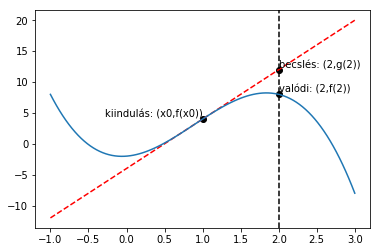

In [2]:
f  = -3*x**3 + 8*x**2 + x - 2 # f a függvényünk (az ábrán kékkel)
df = f.diff()
x0 = 1
g  = f(x0) + df(x0)*(x-x0) # g a becslés (piros szaggatott)

t = np.linspace(-1,3,100)
plot(t,g(t),c='red',ls='--')
plot(t,f(t))
axvline(2,c='black',ls='--')
scatter([x0,2,2],[f(x0),f(2),g(2)],c='black')
annotate('kiindulás: (x0,f(x0))',xy=(x0,f(x0)),horizontalalignment='right',verticalalignment='bottom')
annotate('valódi: (2,f(2))',xy=(2,f(2)),horizontalalignment='left',verticalalignment='bottom')
annotate('becslés: (2,g(2))',xy=(2,g(2)),horizontalalignment='left',verticalalignment='bottom');

Látható, hogy csak akkor működik a dolog, ha $x$ közel van $x_0$-hoz. $x=3$-nál például már elég rossz becslést kapnánk. Zérushelyet keresünk, azaz azt szeretnénk, ha $f(x)=0$ lenne. Ezt behelyettesítve a becslésre szolgáló egyenletünkbe:

\begin{align}
0 = f(x_0) + f'(x_0)(x-x_0)
\end{align}

Rendezzük $x$-re:

\begin{align}
x = x_0 - \frac{f(x_0)}{f'(x_0)}
\end{align}

Ez az algoritmus alapja: ha $x_0$-ra a fenti egyenletet alkalmazzuk, várhatóan a zérushely felé mozdulunk el. Addig ismételgetjük, amíg meg nem találtuk a zérushelyet. Ha végiggondoljátok, hogy az egyenletben lévő hányados szemléletesen mit jelent (idézzétek fel, mit beszéltünk a tangensről), akkor látjátok, hogy tényleg ez lesz a helyzet. 

Szemléltetés: https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif

Kód:

In [3]:
def NewtonRaphson(f,x0,max_iters=100):
    df = f.diff()
    it = 0
    while abs(f(x0))>1e-6 and it<max_iters:
        x0 -= f(x0)/df(x0)
    return x0

## Ötödfokú polinom egy gyökének megkeresése

Legyen a polinom

\begin{align}
f(x) = x^5 - 13x^4 + 59x^3 - 107x^2 + 60x - 1.
\end{align}

Galois-elméletből tudjuk, hogy az ötödfokú egyenletre nem létezik megoldóképlet, úgyhogy eleve csak numerikusan próbálkozhatunk. Talán jobb is így, elrettentésképpen itt a negyedfokú formula: https://upload.wikimedia.org/wikipedia/commons/9/95/Quartic_Formula.jpg

A Newton-Raphson algoritmussal könnyen megtalálhatunk egy-egy gyököt, ha megfelelő helyről indítjuk.

Zérushely: x0 = 3.089, f(x0) = -0.000


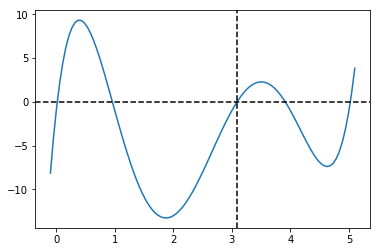

In [4]:
f  = x**5 - 13*x**4 + 59*x**3 - 107*x**2 + 60*x - 1
x0 = NewtonRaphson(f,2.5)
t = np.linspace(-.1,5.1,100)
print("Zérushely: x0 = {:.3f}, f(x0) = {:.3f}".format(x0,f(x0)))
plot(t,f(t))
axhline( 0,ls='--',c='black')
axvline(x0,ls='--',c='black');

## Függvények szélsőértékhelyeinek megkeresése

<b>Feladat.</b> A ferde hajításnál a földről $\alpha$ szögben $v_0$ kezdősebességgel kilőtt test a kilövés helyétől

\begin{align}
\frac{2v_0}{g} \sin \alpha \cos \alpha
\end{align}

távolságra ér földet, ha a közegellenállástól eltekintünk. Milyen szögben lőjük ki a testet, hogy a lehető legmesszebb repüljön?

<b>Megoldás.</b> Korábban megbeszéltük, hogy függvény szélsőértékhelyeinél a derivált értéke nulla (emlékeztető: a hupli alján/tetején az érintő vízszintes, azaz a meredekség nulla). Azaz most a függvény zérushelye helyett a függvény <i>deriváltjának</i> zérushelyét keressük. A Newton-Raphson módszer ugyanúgy használható:

Megoldás: 45.000 fok.


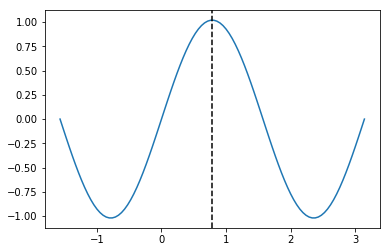

In [5]:
v0 = 10
g  = 9.81
f  = 2*v0/g*Sin(x)*Cos(x)
alpha = NewtonRaphson(f.diff(),3)
print("Megoldás: {:.3f} fok.".format(rad2deg(alpha)))
t = np.linspace(-pi/2,pi,100)
plot(t,f(t))
axvline(alpha,ls='--',c='black');

<b>Feladat.</b> Határozzuk meg egy adott $V$ térfogatú egyenes körhenger alapkörének $R$ sugarát és $m$ magasságát úgy, hogy a henger felszíne minimális legyen!

<b>Megoldás.</b> A henger felszíne és térfogata

\begin{align}
A = 2\pi R^2 + 2\pi m R, \quad V = m R^2 \pi .
\end{align}

A térfogat képletéből fejezzük ki $m$-et és helyettesítsük be a felszín képletébe:

\begin{align}
m = \frac{V}{\pi R^2}, \quad A = 2 \pi R^2 + \frac{2V}{R} .
\end{align}

Keressük meg $A$ szélsőértékhelyét a Newton-Raphson módszerrel.

Megoldás: R = 1.168, m = 2.335.


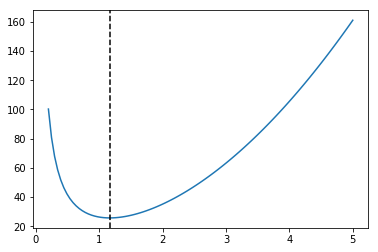

In [6]:
V = 10
A = 2*pi*x**2 + 2*V/x
R = NewtonRaphson(A.diff(),2)
m = V/(pi*R**2)
print("Megoldás: R = {:.3f}, m = {:.3f}.".format(R,m))
t = np.linspace(.2,5,100)
plot(t,A(t));
axvline(R,ls='--',c='black');